In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Load the dataset

In [2]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [3]:
# Convert data to a single DataFrame for easy exploration
df = pd.concat([X, y], axis=1)

##### Display basic information about the dataset

In [4]:
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst 

In [5]:
print("\nData Description:")
print(df.describe())


Data Description:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.

In [6]:
print("\nTarget Class Distribution:")
print(df['target'].value_counts())


Target Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


#### Visualization of target variables

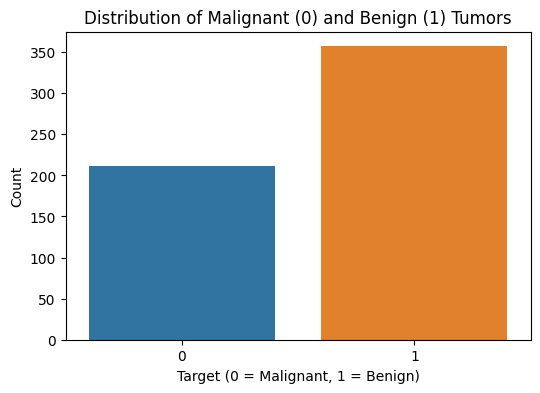

In [8]:
# Visualizing target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target')
plt.title("Distribution of Malignant (0) and Benign (1) Tumors")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()

#### Plot a correlation heatmap for features

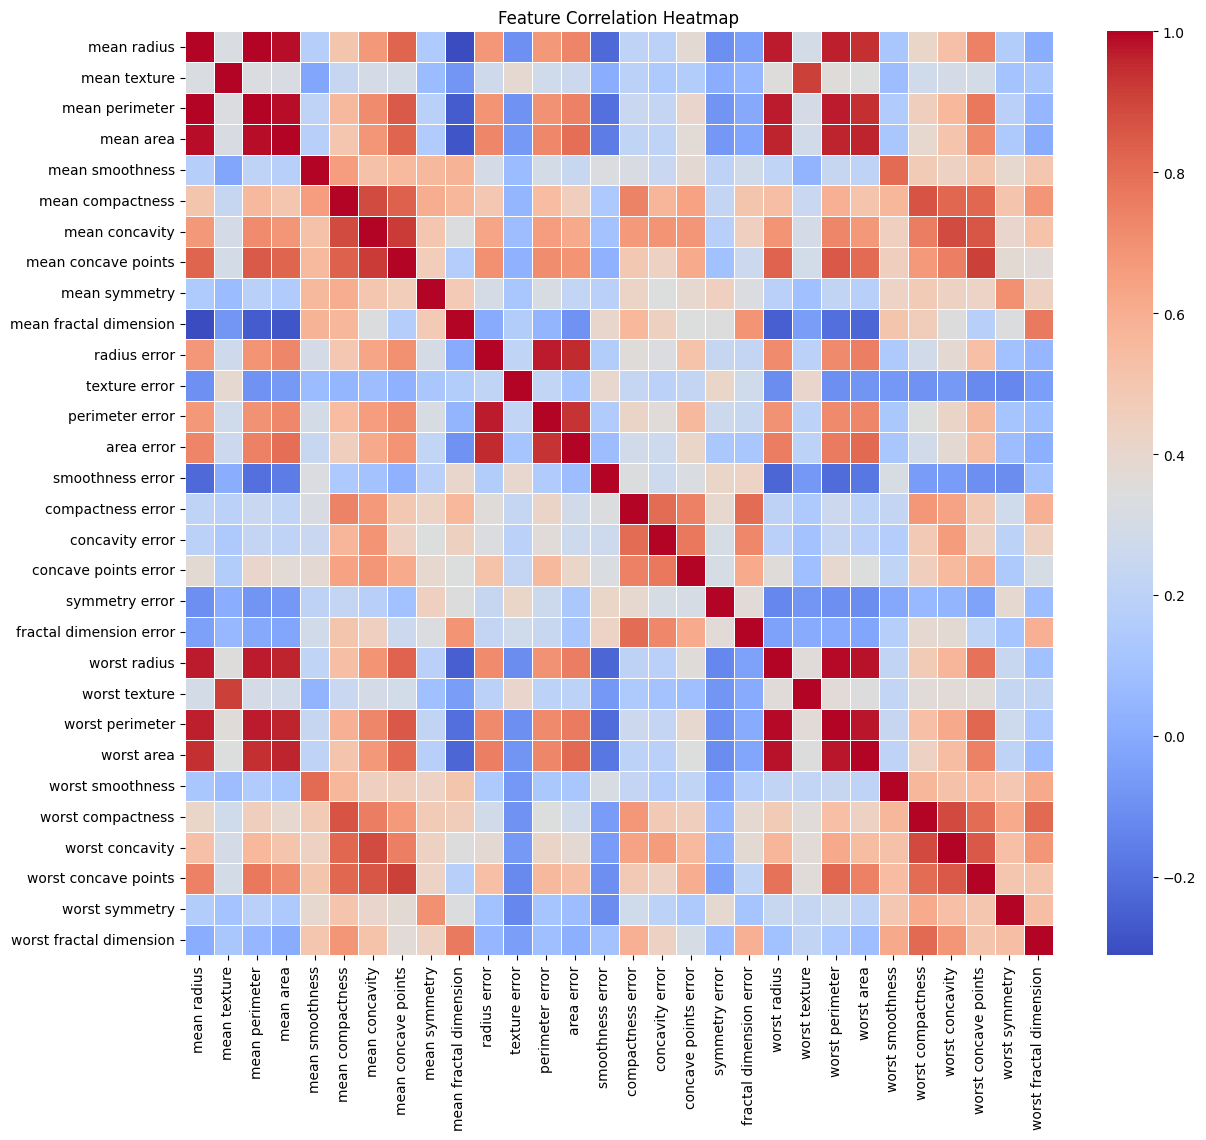

In [9]:

plt.figure(figsize=(14,12))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Visualize a few feature pairs with scatterplots

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


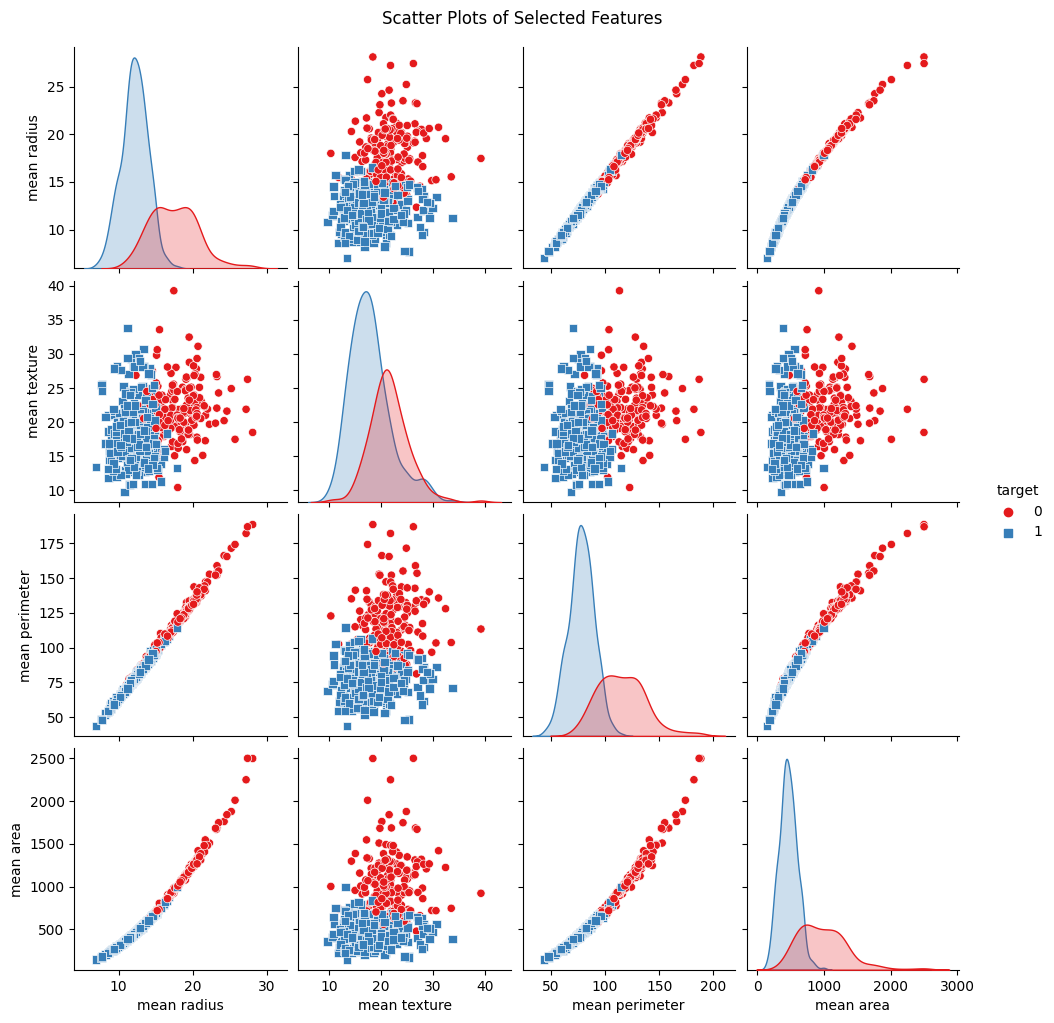

In [10]:

sns.pairplot(df, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'], hue='target', palette='Set1', markers=["o", "s"])
plt.suptitle("Scatter Plots of Selected Features", y=1.02)
plt.show()

#### Standardizing features before modeling (important for KNN and SVC)

In [10]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Splitting the dataset into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Initialize the models

In [15]:

knn_model = KNeighborsClassifier(n_neighbors=5)
svc_model = SVC(kernel='linear')  # Linear kernel for simplicity

#### Train the models

In [16]:

knn_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

#### Make predictions

In [17]:

knn_predictions = knn_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

#### Comparing predictions

In [18]:
# Calculate accuracy for both models
knn_accuracy = accuracy_score(y_test, knn_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)

# Display the results
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"SVC Accuracy: {svc_accuracy * 100:.2f}%")

KNN Accuracy: 95.91%
SVC Accuracy: 97.66%


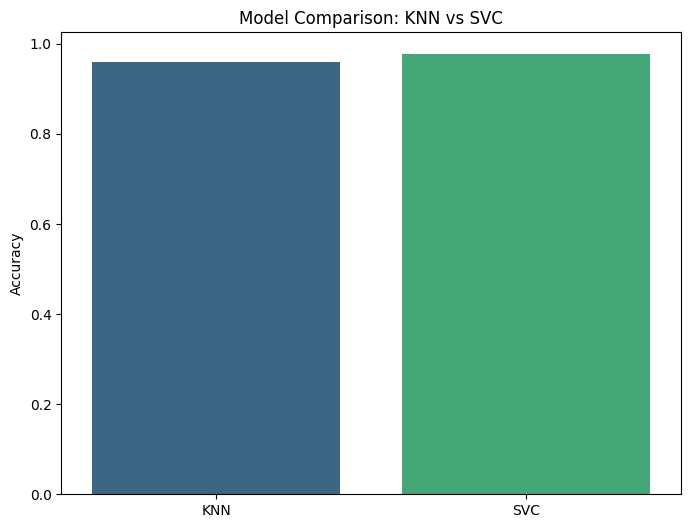

In [19]:
# Optional: Plot a comparison
plt.figure(figsize=(8, 6))
models = ['KNN', 'SVC']
accuracies = [knn_accuracy, svc_accuracy]
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Comparison: KNN vs SVC")
plt.ylabel("Accuracy")
plt.show()

## Models performance Comparison: KNN vs SVC

Here we are comparing two models: **K-Nearest Neighbors (KNN)** and **Support Vector Classifier (SVC)** using the **Breast Cancer Dataset** from the sklearn library.

### Results Summary:

- **KNN Accuracy**: 95.91%
- **SVC Accuracy**: 97.66%

#### What do these results mean?

- **SVC (Support Vector Classifier)**: The SVC model has a higher accuracy compared to the KNN model (97.66% vs 95.91%). This indicates that the SVC model is doing a better job at classifying the data correctly. SVC works well with linearly separable data, and it tends to find an optimal boundary between the classes.

- **KNN (K-Nearest Neighbors)**: While the KNN model has good accuracy (95.91%), it relies on the number of neighbors (`k`) chosen and the distance between data points. KNN can be slower with large datasets, but it is a simple and intuitive model that works well in many cases.

#### Comparison and Insights:

- **SVC**: SVC performs well with linearly separable data and constructs an optimal decision boundary. In this case, the data is likely linearly separable, which is why SVC performs better.
  
- **KNN**: KNN also has good performance, but its accuracy can fluctuate depending on the choice of `k`. It is a non-parametric model and is sensitive to the scaling of the data, which is why feature scaling (via `StandardScaler`) was applied in this case.

#### Key Takeaways:

1. **SVC** is recommended for linearly separable data because it optimizes the decision boundary between classes.
   
2. **KNN** is a simple, non-parametric model that works well with small datasets and clean data, but its performance is sensitive to the choice of `k` and the distance metric used.

#### Next Steps:

1. **Hyperparameter Tuning**:
   - **For KNN**: Experiment with different values of `k` and observe how it affects the accuracy.
   - **For SVC**: Try using non-linear kernels like **RBF** or **Polynomial** and adjust the `C` and `gamma` parameters for better performance.

2. **Cross-Validation**: Use **cross-validation** to ensure that the models are not overfitting to the training data and are generalizing well to new data.

#### Requirements:

- **scikit-learn** for machine learning models.
- **numpy** for data manipulation.
- **matplotlib** for plotting and visualization.

#### Installation:

To install the required libraries, run the following command:

```bash
pip install scikit-learn numpy matplotlib
```